In [3]:
# The algebraic cubic equation
def cubic(x,c):
    return x**3 - x + c 

In [4]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import import_ipynb

In [5]:
# The Hopf bifurcation equations 
def Hopf(t,z,b,s):
    u1, u2 = z[0], z[1]
    return np.array([b*u1 - u2 + s*u1*(u1**2 + u2**2), u1 + b*u2 + s*u2*(u1**2 +u2**2)])

In [6]:
# The modified Hopf bifurcation equations 
def mod_Hopf(t,z,b,s):
    u1, u2 = z[0], z[1]
    return [b*u1 - u2 + s*u1*(u1**2 + u2**2) - u1*(u1**2 + u2**2)**2, u1 + b*u2 + s*u2*(u1**2 +u2**2) - u2*(u1**2 + u2**2)**2]

In [7]:
def shooting(u0, fun, args):
    u, T = u0[:-1], u0[-1]
    sol = solve_ivp(fun, (0,T), u, args = args, rtol = 1e-6)
    final_states = sol.y[:,-1]
    phase_condition = np.array([fun(T, u, args[0], args[1])[0]])
    end = u-final_states
    return np.concatenate((u-final_states, phase_condition))
    #return np.concatenate((end,phase_condition))

In [8]:
#find the roots of the system of 2 ODE's with an initial guess
from scipy.optimize import fsolve
s=-1
root = fsolve(shooting,[1,0,6.2],args = (Hopf, (2,s)))
root

array([ 1.41421405e+00, -1.96663379e-06,  6.28319044e+00])

In [9]:
c=1

In [10]:
fsolve(cubic, 1, args=(c))

/Users/theabarnes/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([0.57739259])

In [13]:
# for the cubic equation
def Numerical_Continuation_x(initial_guess, fun, start, end, h, parameter):
    """
    A function that performs natural parameter continution for specified
    equations or ODE. For example, it increments a parameter by a set amount and
    attempts to find the solution for the new parameter value using the 
    last found solution as an initial guess.

    Parameters
    ----------
    initial_guess : np.array
        The initial guess is an array of the initial guess values for the
        equations followed by a period.
        
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array.
    
    start:  value(int or float)
        The initial value for the parameter
    
    end: value(int or float)
        The end value for the parameter
    
    h: value(int or float)
        The step-size we wish to increment the parameter by
        
    parameter: variable name
              The parameter for the ODE (fun) we wish to vary

    Returns
    -------
    Returns a graph showing how the solution of the ODE/equations
    changes as the parameter is incremented from start to end value.
    """ 
    
    x = []
    y = []
    period = []
    for parameter in np.arange(start,end,h):
        #root = fsolve(shooting,initial_guess,args = (equations, (b,s)))
        root = fsolve(fun,initial_guess,args=(parameter))
        initial_guess = root
        x.append(root[0])
        #y.append(root[1])
        #period.append(root[2])
    plt.xlabel('parameter')
    plt.ylabel('solution')
    plt.title('Natural parameter continuation of ...')
    plot = plt.plot(np.arange(start,end,h), x)
    #plot = plt.plot(np.arange(start,end,stepsize), y)
    #plot = plt.plot(np.arange(start,end,stepsize), period)
    plt.legend(['x','y','period'], loc = "upper right")
    return 
    

/Users/theabarnes/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


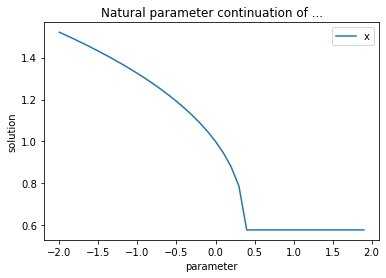

In [14]:
Numerical_Continuation_x(1, cubic, -2, 2, 0.1, c)

In [19]:
def Numerical_Continuation(initial_guess, fun, start, end, h):
    """
    A function that performs natural parameter continution for a system of
    2 ODE's. It increments the parameter beta (b) by a set amount and
    attempts to find the solution for the new parameter value using the 
    last found solution as an initial guess.

    Parameters
    ----------
    initial_guess : np.array
        The initial guess is an array of the initial guess values for the
        equations followed by a period.
        
    fun : function
        The ODE we wish to solve. The ode function should take
        a single parameter (the state vector) and return the
        right-hand side of the ODE as a numpy.array. Input 'Hopf'
        or 'mod_Hopf'.
    
    start:  value(int or float)
        The initial value for the parameter
    
    end: value(int or float)
        The end value for the parameter
    
    h: value(int or float)
        The step-size we wish to increment the parameter by. Note this
        value should be negative if the start value is positive and the 
        end value is negative

    Returns
    -------
    Returns a graph showing how the solution of the ODE/equations
    changes as the value of beta (b) is incremented from start to end value.
    """ 
    
    x = []
    y = []
    period = []
    for b in np.arange(start,end,h):
        root = fsolve(shooting,initial_guess,args = (fun, (b,s)))
        initial_guess = root
        x.append(root[0])
        y.append(root[1])
        period.append(root[2])
    plt.xlabel('beta')
    plt.ylabel('solution')
    plt.title('Natural parameter continuation of ...')
    plot = plt.plot(np.arange(start,end,h), x)
    plot = plt.plot(np.arange(start,end,h), y)
    plot = plt.plot(np.arange(start,end,h), period)
    plt.legend(['x','y','period'], loc = "upper right")
    return 
    
    

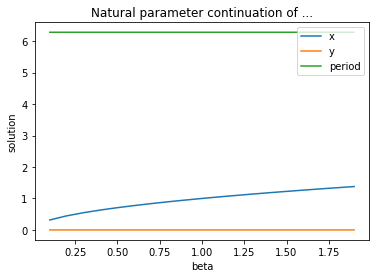

In [20]:
Numerical_Continuation([1,0,6.2],Hopf,0.1,2,0.1)

/Users/theabarnes/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


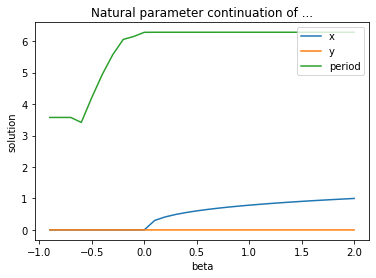

In [10]:
Numerical_Continuation([1,0,6.2],mod_Hopf,2,-1,-0.1)

In [ ]:
#Numerical continuation for Hopf bifurcation equations 
#increments the a parameter by a set amount and attempts to find the solution
#for the new parameter value using the last found solution as an initial guess
#phase_condition = 6.2
#initial_guess=[1,0,phase_condition]
#roots = []
#for b in np.arange(0.1,2,0.1):
    #root = fsolve(shooting,initial_guess,args = (Hopf, (b,s)))
    #initial_guess = root
    #roots.append(root)     

In [ ]:
# Numerical continuation for modified Hopf bifurcation equations 
#increments the a parameter by a set amount and attempts to find the solution
#for the new parameter value using the last found solution as an initial guess
#phase_condition_1 = 6.2
#initial_guess_1=[1,0,phase_condition_1]
#roots_1 = []
#for b in np.arange(2,-1,-0.1):
    #root_1 = fsolve(shooting,initial_guess_1,args = (mod_Hopf, (b,s)))
    #initial_guess_1 = root_1
    #roots_1.append(root_1)  

In [ ]:
#plt.plot(np.arange(0.1,2,0.1), roots)

In [ ]:
# perform pseudo-arclength continuation
